# APS

Code to process, work with and plot APS data to create indicators about skills supply in the UK. 

We are interested in the following indicators:

* Percentage of the population with tertiary education
* Percentage of population employed in professional occupations

Raw collected from https://www.nomisweb.co.uk/articles/676.aspx

See [this table](https://docs.google.com/spreadsheets/d/1V2fAQcvuLsoImwo6uLdyIK3x80pBNoX97CxsxkjvRP4/edit?usp=sharing) for more information.

## Preamble

In [3]:
import requests 

import numpy as np 
import pandas as pd 
import json
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

## (Processed) Data Collection

In [5]:
data_edu = '/mnt/c/Users/aotubusen/Documents/DS Projects/nesta_beis/beis-indicators/data/processed/aps/8_11_2019_aps_tertiary_education_dec_2018_data.csv'
data_occupations = '/mnt/c/Users/aotubusen/Documents/DS Projects/nesta_beis/beis-indicators/data/processed/aps/8_11_2019_aps_pro_occupations_dec_2018_data.csv'

In [11]:
df_edu = pd.read_csv(data_edu)
df_edu.set_index('geography_name', inplace=True)
df_edu

,geography_code,% with NVQ4+ - aged 16-64
geography_name,,
Bedfordshire and Hertfordshire,UKH2,40.9
"Berkshire, Buckinghamshire and Oxfordshire",UKJ1,48.3
Cheshire,UKD6,42.7
Cornwall and Isles of Scilly,UKK3,34.8
Cumbria,UKD1,31.8
Derbyshire and Nottinghamshire,UKF1,33.4
Devon,UKK4,36.9
Dorset and Somerset,UKK2,34.6
East Anglia,UKH1,34.2


Text(0.5, 0, 'NUTS2 Region')

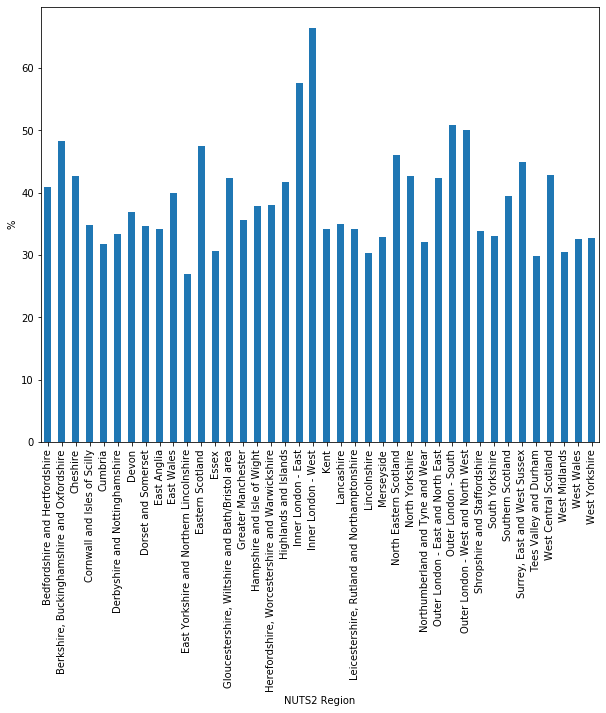

In [18]:
df_edu['% with NVQ4+ - aged 16-64'].plot(kind='bar', figsize=(10,8))
plt.ylabel('%')
plt.xlabel('NUTS2 Region')

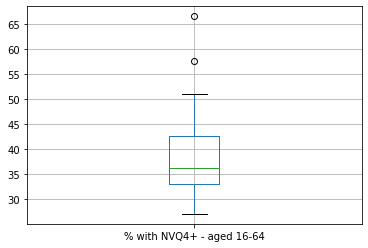

In [15]:
df_edu.boxplot()
# df_edu.boxplot(column='obs_value', by='geography_name',figsize=(20,10))

In [29]:
df_occ = pd.read_csv(data_occupations)
df_occ.set_index(['geography_name', 'geography_code'], inplace=True)
df_occ

,,"% all in employment who are - 1: managers, directors and senior officials (SOC2010)",% all in employment who are - 2: professional occupations (SOC2010),% all in employment who are - 3: associate prof & tech occupations (SOC2010),% all in employment who are - 4: administrative and secretarial occupations (SOC2010),% all in employment who are - 5: skilled trades occupations (SOC2010),"% all in employment who are - 6: caring, leisure and other service occupations (SOC2010)",% all in employment who are - 7: sales and customer service occupations (SOC2010),"% all in employment who are - 8: process, plant and machine operatives (SOC2010)",% all in employment who are - 9: elementary occupations (SOC2010)
geography_name,geography_code,,,,,,,,,
Bedfordshire and Hertfordshire,UKH2,12.6,21.3,15.6,11.2,9.1,8.3,6.6,5.7,9.4
"Berkshire, Buckinghamshire and Oxfordshire",UKJ1,13.5,24.6,17.9,9.7,8.1,7.6,7.1,4.1,7.3
Cheshire,UKD6,13.5,24.4,15.8,9.9,7.3,7.6,7.9,5.3,8.2
Cornwall and Isles of Scilly,UKK3,11.0,14.6,11.8,7.6,14.5,11.8,8.0,5.8,14.8
Cumbria,UKD1,11.1,18.4,10.1,9.7,14.0,10.3,7.1,7.6,11.5
Derbyshire and Nottinghamshire,UKF1,10.0,17.6,13.6,9.6,10.8,9.9,8.1,7.0,13.2
Devon,UKK4,11.2,18.5,14.4,8.9,12.0,9.1,7.7,6.5,11.3
Dorset and Somerset,UKK2,12.2,18.9,12.8,9.6,13.2,9.8,6.6,5.9,10.7
East Anglia,UKH1,10.8,20.3,13.1,10.1,10.9,9.8,7.5,7.0,10.4


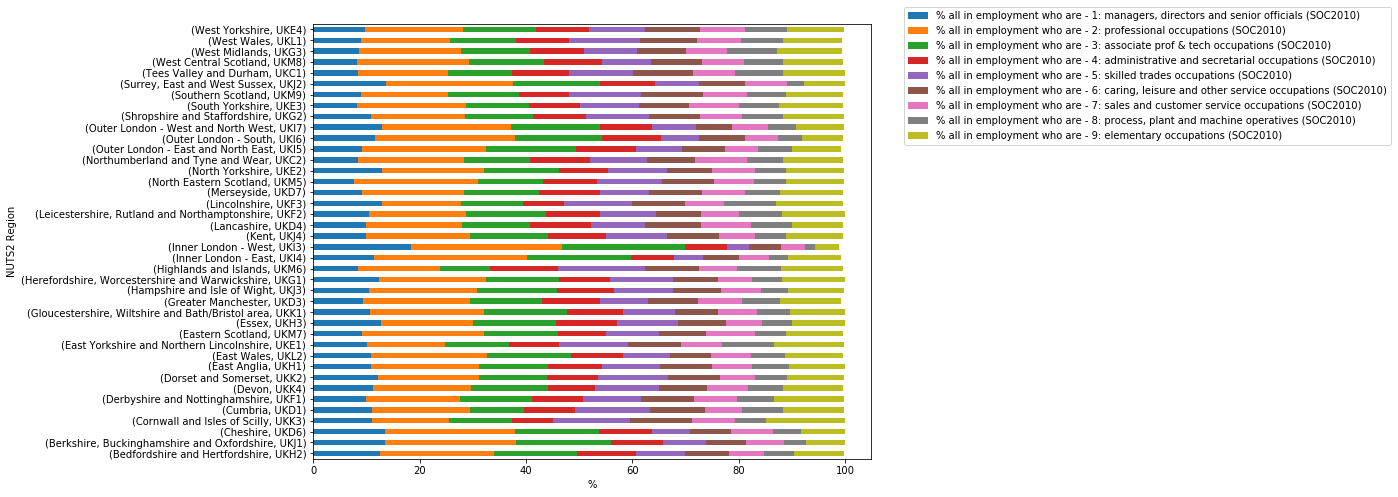

In [32]:
df_occ.plot(kind='barh', figsize=(10,8), stacked=True)
plt.xlabel('%')
plt.ylabel('NUTS2 Region')
plt.legend(bbox_to_anchor=(1.05, 1.05))

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40]), <a list of 40 Text xticklabel objects>)

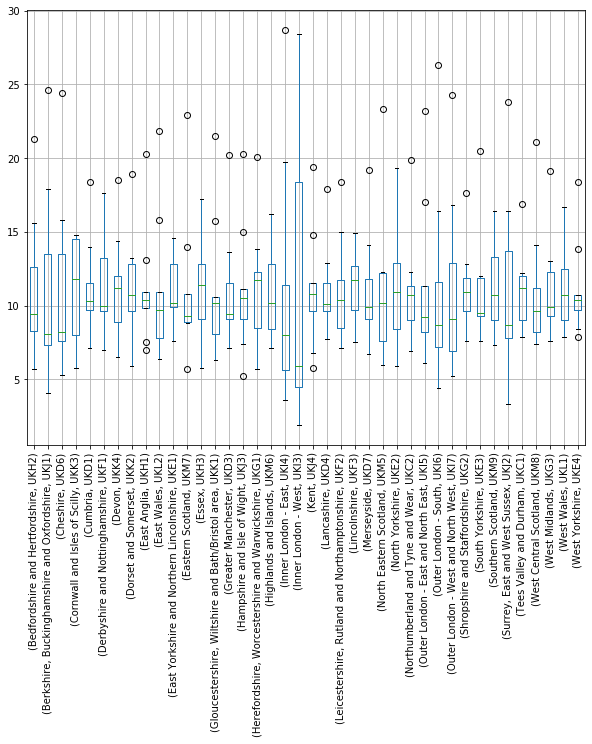

In [36]:
df_occ.T.boxplot(figsize=(10,8))
plt.xticks(rotation=90)

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 9 Text xticklabel objects>)

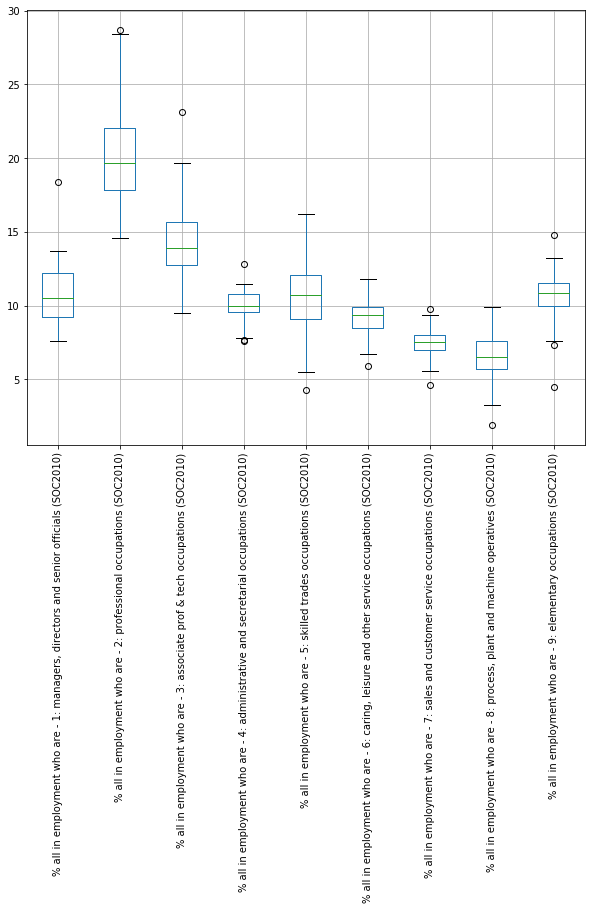

In [37]:
df_occ.boxplot(figsize=(10,8))
plt.xticks(rotation=90)